In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import script
import matplotlib.pyplot as plt
from itertools import product

In [7]:
df = pd.read_csv('data/sample_data.csv')

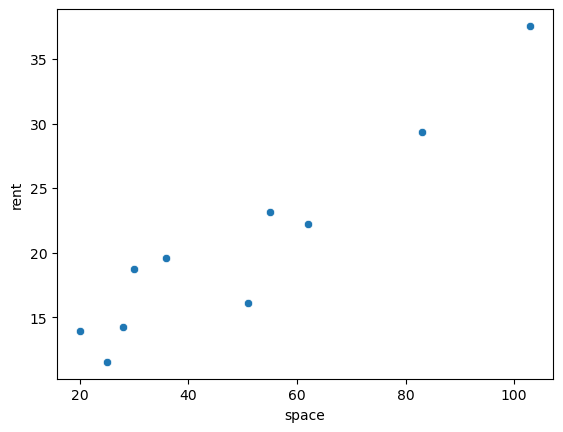

In [3]:
ax = sns.scatterplot(data=df, x='space', y='rent')

In [8]:
x = df['space'].values
y = df['rent'].values
script.fix_cost_func(5, 7, x=x, y=y)

138703.20244638805

In [9]:
theta_0 = np.arange(-1, 1.5, 0.5)
theta_1 = np.arange(-20, 30, 10)
z = []
X, Y = np.meshgrid(theta_0, theta_1)
X
Y


# ax = plt.axes(projection='3d')
# ax.plot_surface(X=x, Y=y, Z=z)

array([[-20, -20, -20, -20, -20],
       [-10, -10, -10, -10, -10],
       [  0,   0,   0,   0,   0],
       [ 10,  10,  10,  10,  10],
       [ 20,  20,  20,  20,  20]])

In [17]:
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)

z = [script.fix_cost_func(*param, x, y) for param in list(product(theta_0, theta_1))]
Z = np.array(z).reshape(n0, n1)
# np.array(z).size
len(list(product(theta_0, theta_1)))
list(product(theta_0, theta_1))

[(-20.0, -1.0),
 (-20.0, -0.9933110367892977),
 (-20.0, -0.9866220735785953),
 (-20.0, -0.979933110367893),
 (-20.0, -0.9732441471571907),
 (-20.0, -0.9665551839464883),
 (-20.0, -0.959866220735786),
 (-20.0, -0.9531772575250836),
 (-20.0, -0.9464882943143813),
 (-20.0, -0.939799331103679),
 (-20.0, -0.9331103678929766),
 (-20.0, -0.9264214046822743),
 (-20.0, -0.919732441471572),
 (-20.0, -0.9130434782608696),
 (-20.0, -0.9063545150501673),
 (-20.0, -0.8996655518394648),
 (-20.0, -0.8929765886287625),
 (-20.0, -0.8862876254180602),
 (-20.0, -0.8795986622073578),
 (-20.0, -0.8729096989966555),
 (-20.0, -0.8662207357859532),
 (-20.0, -0.8595317725752508),
 (-20.0, -0.8528428093645485),
 (-20.0, -0.8461538461538461),
 (-20.0, -0.8394648829431438),
 (-20.0, -0.8327759197324415),
 (-20.0, -0.8260869565217391),
 (-20.0, -0.8193979933110368),
 (-20.0, -0.8127090301003345),
 (-20.0, -0.8060200668896321),
 (-20.0, -0.7993311036789298),
 (-20.0, -0.7926421404682275),
 (-20.0, -0.785953177257525

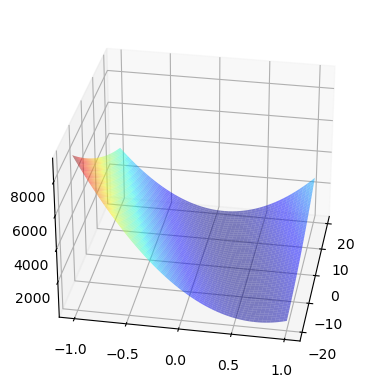

In [17]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

In [9]:
# 最急降下法
# theta_0_init = np.random.uniform(min_0, max_0) # 本当は値をランダムで設定する
# theta_1_init = np.random.uniform(min_1, max_1)

theta_0_init = -5
theta_1_init = -0.5

def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
  return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
  return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

epochs = 100000
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
  updated_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
  updated_theta_1 = update_theta1(theta_1_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
  theta_0_hist.append(updated_theta_0)
  theta_1_hist.append(updated_theta_1)

In [18]:
cost_hist = [script.fix_cost_func(*params, x, y) for params in list(zip(theta_0_hist, theta_1_hist))]

NameError: name 'theta_0_hist' is not defined

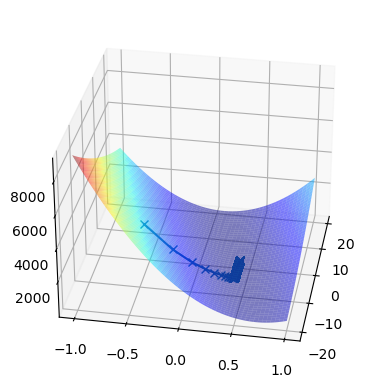

In [18]:
ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

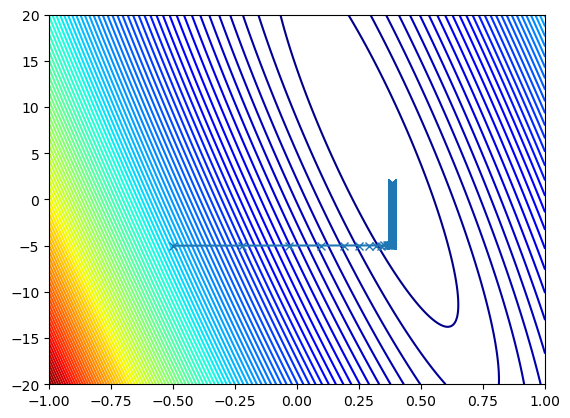

In [21]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')

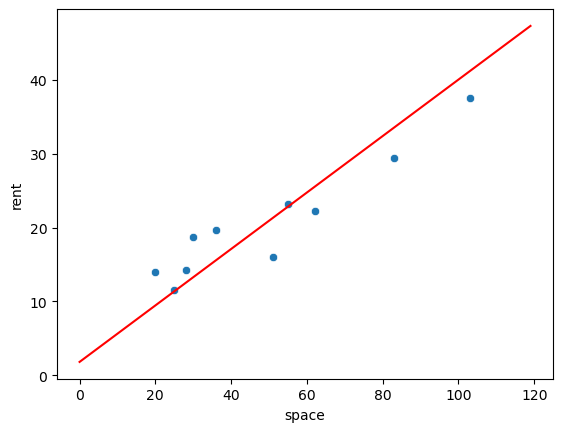

In [23]:
sns.scatterplot(data=df, x='space', y='rent')
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1] * x_values
plt.plot(x_values, y_values, '-', color='r')